In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def analystic_solution(return_type, P0, t, sigma, value):
    """
    function used to calculate the analystic solution
    return_types means the type of return
    P0 means the start price, t means the time range
    sigma is the standard deviation of return
    value means the return value, if value == expected, return expected value, 
    if value == std_dev, return the standard deviation   
    """
    
    if return_type == 'Classical':
        expected_value = P0
        std_dev = np.sqrt(t) * sigma 
    elif return_type == 'Arithmetic':
        expected_value = P0
        std_dev = np.sqrt(P0 ** 2 * ((1 + sigma ** 2) ** t - 1))
    elif return_type == 'Log':
        expected_value = np.exp(np.log(P0) + (t * sigma ** 2) / 2)
        std_dev = np.sqrt((np.exp(t * sigma ** 2) - 1) * np.exp(2 * np.log(P0) + t * sigma ** 2))
        
    if value == 'expected':
        return expected_value
    elif value == 'std_dev':
        return std_dev

In [3]:
def simulation_solution(return_type, P0, t, sigma, value):
    Pfinal = np.empty(100)
    #simulate 100 times
    for times in range(100):
    
        P = np.empty(t + 1)
        P[0] = P0
    
        if return_type == 'Classical':
            for i in range(1, t + 1):
                P[i] = P[i - 1] + np.random.normal(0, sigma)
        elif return_type == 'Arithmetic':
            for i in range(1, t + 1):
                P[i] = P[i - 1] * (1 + np.random.normal(0, sigma))
        elif return_type == 'Log':
            for i in range(1, t + 1):
                P[i] = P[i - 1] * np.exp(np.random.normal(0, sigma))
        
        Pfinal[times] = P[t]
        times = times + 1
    
    expected_value = Pfinal.mean()
    std_dev = Pfinal.std()
    
    if value == 'expected':
        return expected_value
    elif value == 'std_dev':
        return std_dev

In [4]:
print("Classical Analysitcal Mean " + str(analystic_solution('Classical', 1, 1, 0.01, 'expected')))
print("Classical Simulation Mean " + str(simulation_solution('Classical', 1, 1, 0.01, 'expected')))
print("Classical Analysitcal Std Dev " + str(analystic_solution('Classical', 1, 1, 0.01, 'std_dev')))
print("Classical Simulation Std Dev " + str(analystic_solution('Classical', 1, 1, 0.01, 'std_dev')))

Classical Analysitcal Mean 1
Classical Simulation Mean 0.999468447997959
Classical Analysitcal Std Dev 0.01
Classical Simulation Std Dev 0.01


In [5]:
print("Arithmetic Analysitcal Mean " + str(analystic_solution('Arithmetic', 1, 1, 0.01, 'expected')))
print("Arithmetic Simulation Mean " + str(simulation_solution('Arithmetic', 1, 1, 0.01, 'expected')))
print("Arithmetic Analysitcal Std Dev " + str(analystic_solution('Arithmetic', 1, 1, 0.01, 'std_dev')))
print("Arithmetic Simulation Std Dev " + str(analystic_solution('Arithmetic', 1, 1, 0.01, 'std_dev')))

Arithmetic Analysitcal Mean 1
Arithmetic Simulation Mean 0.9995575800022708
Arithmetic Analysitcal Std Dev 0.009999999999999449
Arithmetic Simulation Std Dev 0.009999999999999449


In [6]:
print("Log Analysitcal Mean " + str(analystic_solution('Log', 1, 1, 0.01, 'expected')))
print("Log Simulation Mean " + str(simulation_solution('Log', 1, 1, 0.01, 'expected')))
print("Log Analysitcal Std Dev " + str(analystic_solution('Log', 1, 1, 0.01, 'std_dev')))
print("Log Simulation Std Dev " + str(analystic_solution('Log', 1, 1, 0.01, 'std_dev')))

Log Analysitcal Mean 1.0000500012500209
Log Simulation Mean 1.0010370637603327
Log Analysitcal Std Dev 0.010000750030211357
Log Simulation Std Dev 0.010000750030211357


In [7]:
X = np.linspace(0, 0.1, 100)

Y_ana_mean = np.empty(100)
for i in range(100):
    Y_ana_mean[i] = analystic_solution('Classical', 1, 1, X[i], 'expected')
    
Y_sim_mean = np.empty(100)
for i in range(100):
    Y_sim_mean[i] = simulation_solution('Classical', 1, 1, X[i], 'expected')
    
Y_ana_std = analystic_solution('Classical', 1, 1, X, 'std_dev')
Y_sim_std = np.empty(100)
for i in range(100):
    Y_sim_std[i] = simulation_solution('Classical', 1, 1, X[i], 'std_dev')

Text(0.5, 0.98, 'Classical Brownian Motion')

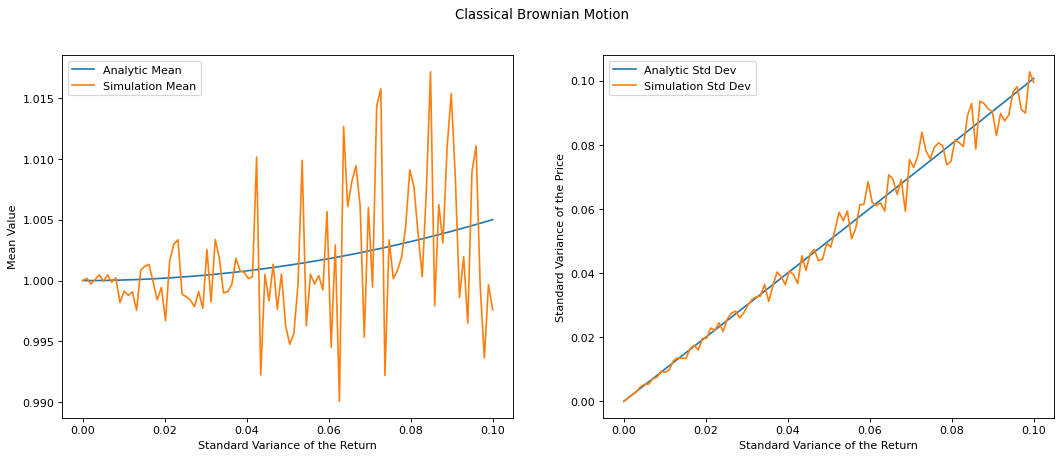

In [11]:
fg = plt.figure(figsize=(16,6), dpi=80)
ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel('Standard Variance of the Return')
ax1.set_ylabel('Mean Value')
plt.plot(X, Y_ana_mean, label = "Analytic Mean")
plt.plot(X, Y_sim_mean, label = "Simulation Mean")
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('Standard Variance of the Return')
ax2.set_ylabel('Standard Variance of the Price')
plt.plot(X, Y_ana_std, label = "Analytic Std Dev")
plt.plot(X, Y_sim_std, label = "Simulation Std Dev")
plt.legend()

plt.suptitle('Classical Brownian Motion')

Text(0.5, 0.98, 'Arithmetic Return System')

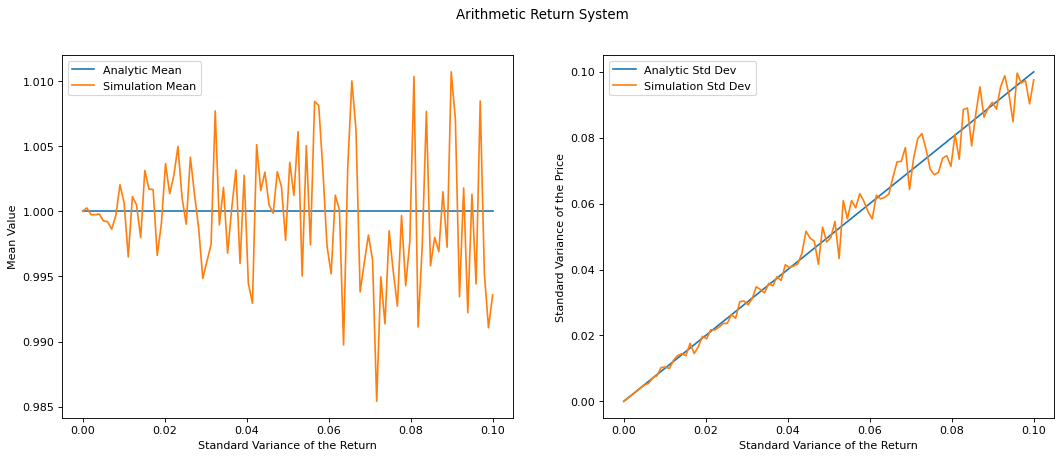

In [12]:
X = np.linspace(0, 0.1, 100)

Y_ana_mean = np.empty(100)
for i in range(100):
    Y_ana_mean[i] = analystic_solution('Arithmetic', 1, 1, X[i], 'expected')
    
Y_sim_mean = np.empty(100)
for i in range(100):
    Y_sim_mean[i] = simulation_solution('Arithmetic', 1, 1, X[i], 'expected')
    
Y_ana_std = analystic_solution('Arithmetic', 1, 1, X, 'std_dev')
Y_sim_std = np.empty(100)
for i in range(100):
    Y_sim_std[i] = simulation_solution('Arithmetic', 1, 1, X[i], 'std_dev')
    
fg = plt.figure(figsize=(16,6), dpi=80)
ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel('Standard Variance of the Return')
ax1.set_ylabel('Mean Value')
plt.plot(X, Y_ana_mean, label = "Analytic Mean")
plt.plot(X, Y_sim_mean, label = "Simulation Mean")
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('Standard Variance of the Return')
ax2.set_ylabel('Standard Variance of the Price')
plt.plot(X, Y_ana_std, label = "Analytic Std Dev")
plt.plot(X, Y_sim_std, label = "Simulation Std Dev")
plt.legend()

plt.suptitle('Arithmetic Return System')

Text(0.5, 0.98, 'Log Return Motion')

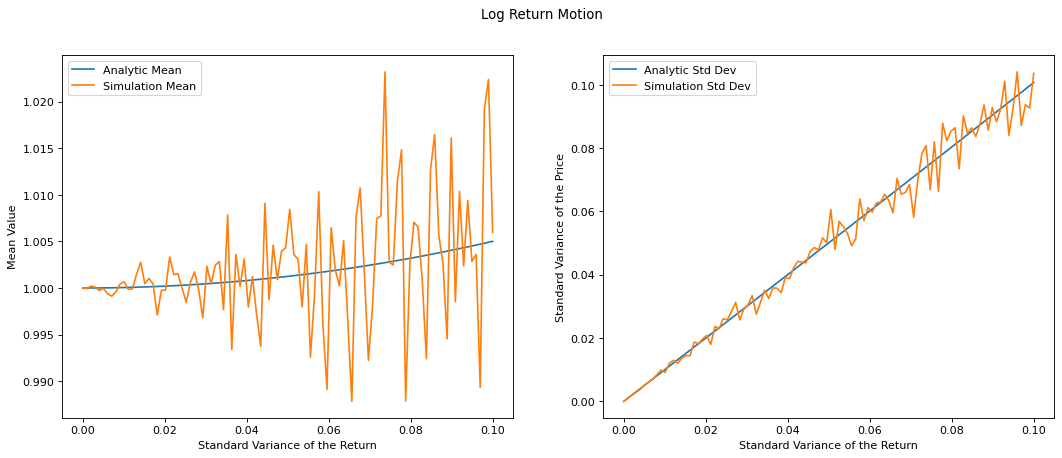

In [13]:
X = np.linspace(0, 0.1, 100)

Y_ana_mean = np.empty(100)
for i in range(100):
    Y_ana_mean[i] = analystic_solution('Log', 1, 1, X[i], 'expected')
    
Y_sim_mean = np.empty(100)
for i in range(100):
    Y_sim_mean[i] = simulation_solution('Log', 1, 1, X[i], 'expected')
    
Y_ana_std = analystic_solution('Log', 1, 1, X, 'std_dev')
Y_sim_std = np.empty(100)
for i in range(100):
    Y_sim_std[i] = simulation_solution('Log', 1, 1, X[i], 'std_dev')
    
fg = plt.figure(figsize=(16,6), dpi=80)
ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel('Standard Variance of the Return')
ax1.set_ylabel('Mean Value')
plt.plot(X, Y_ana_mean, label = "Analytic Mean")
plt.plot(X, Y_sim_mean, label = "Simulation Mean")
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel('Standard Variance of the Return')
ax2.set_ylabel('Standard Variance of the Price')
plt.plot(X, Y_ana_std, label = "Analytic Std Dev")
plt.plot(X, Y_sim_std, label = "Simulation Std Dev")
plt.legend()

plt.suptitle('Log Return Motion')